<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [4]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2     # Degree = 2

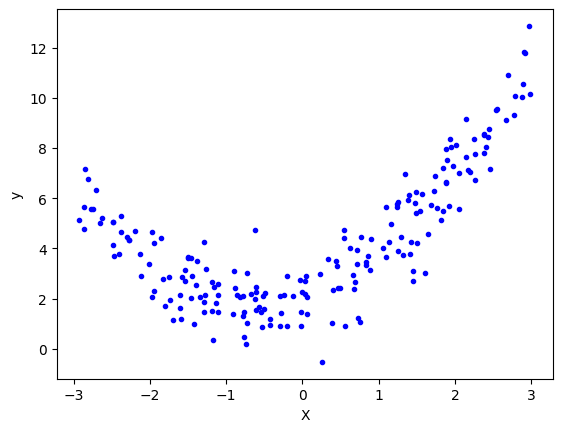

In [5]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
# Applying linear regression
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.2648261876949807

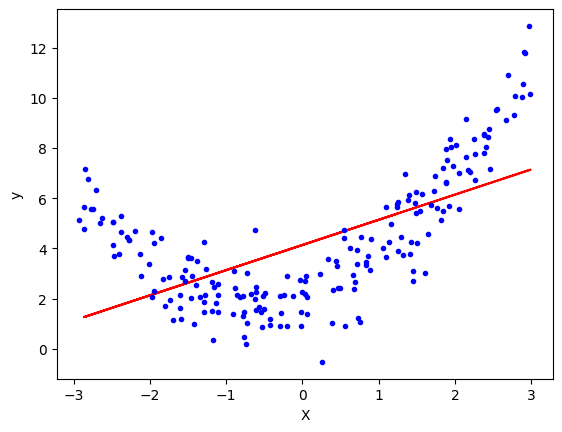

In [10]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [53]:
# Applying Polynomial Linear Regression
# degree 2
# poly = PolynomialFeatures(degree=2,include_bias=True)
poly = PolynomialFeatures(degree=7,include_bias=True)
# poly = PolynomialFeatures(degree=2,include_bias=False)      # False -> removes interscept

# Transforming features  -> Only for input features
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [54]:
print(X_train[0])
print(X_train_trans[0])       # Degreefied

[-2.8605871]
[ 1.00000000e+00 -2.86058710e+00  8.18295858e+00 -2.34080658e+01
  6.69608111e+01 -1.91547233e+02  5.47937544e+02 -1.56742307e+03]


In [55]:
# include_bias parameter

In [56]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(X_test_trans)

In [58]:
r2_score(y_test,y_pred)

0.8337409438979109

In [59]:
print(lr.coef_)             # Cross varify from above
print(lr.intercept_)

[[ 0.00000000e+00  7.11199811e-01  7.01333008e-01  3.00395747e-01
   1.00008493e-02 -8.36540995e-02 -3.01619994e-04  5.91358844e-03]]
[2.11699813]


In [60]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

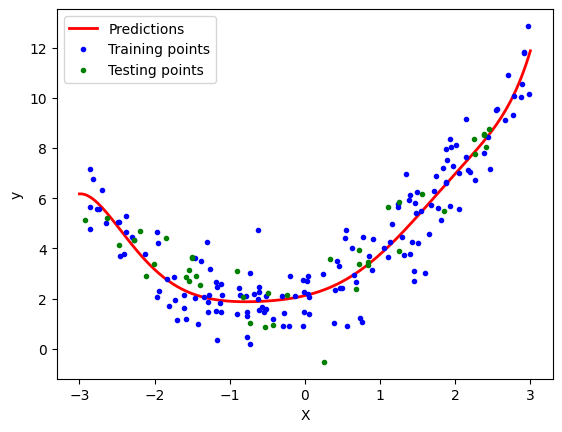

In [61]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [62]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

In [63]:
polynomial_regression(5)

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

In [64]:
polynomial_regression(15)

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

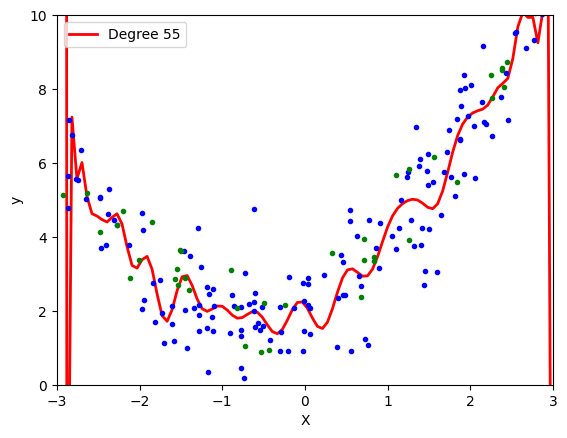

In [29]:
polynomial_regression(55)

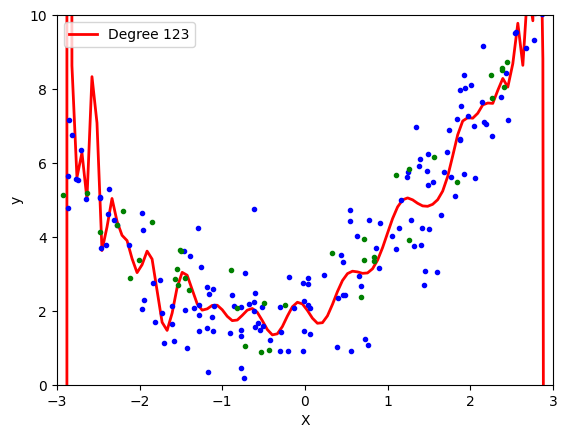

In [33]:
polynomial_regression(123)
# Overfits -> Patterns ratofied

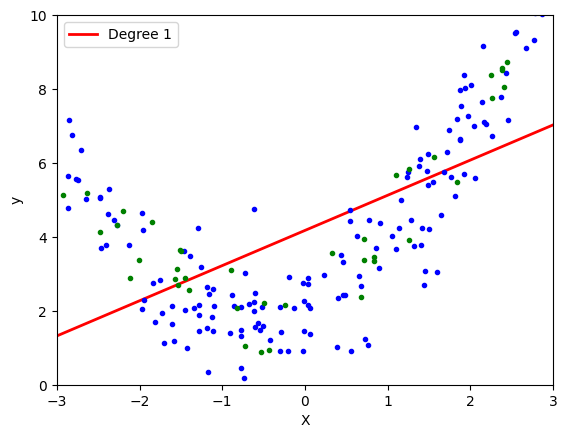

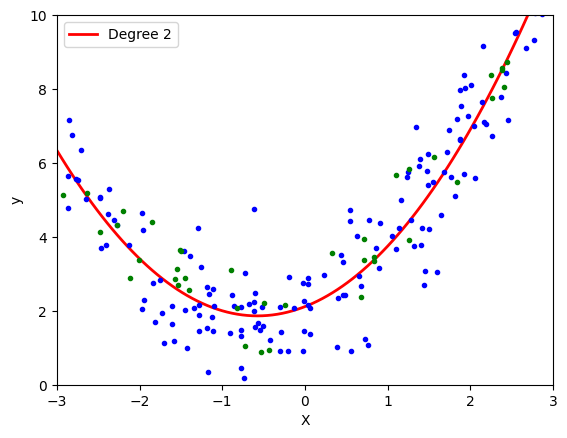

In [38]:
polynomial_regression(1)
polynomial_regression(2)

In [34]:
poly.powers_

array([[0],
       [1],
       [2]])

C:\Users\91842\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


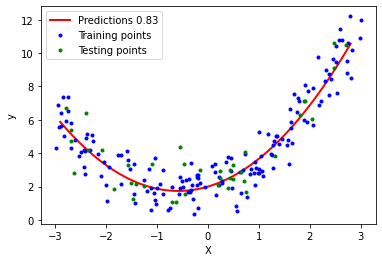

In [ ]:
# Applying Gradient Descent
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [39]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [40]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [65]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [66]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))
fig.show()

In [67]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [75]:
# poly = PolynomialFeatures(degree=2)
poly = PolynomialFeatures(degree=7)
X_multi_trans = poly.fit_transform(X_multi)

In [76]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 36
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]
 [7 0]
 [6 1]
 [5 2]
 [4 3]
 [3 4]
 [2 5]
 [1 6]
 [0 7]]


In [77]:
X_multi_trans.shape

(100, 36)

In [78]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [79]:
X_test_multi = poly.transform(final)

In [80]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [81]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()